# <center>Univariate Analysis</center>

In [1]:
import pandas as pd
df=pd.read_csv("archive/city_hour.csv")
df=df[["PM2.5","PM10","NO2","SO2","O3","AQI"]].dropna().reset_index()
df=df.drop(["index"],axis=1)
df

,PM2.5,PM10,NO2,SO2,O3,AQI
0,25.91,84.90,58.41,140.10,47.69,255.0
1,27.27,98.29,71.93,144.20,71.96,255.0
2,27.27,102.68,66.79,124.37,88.85,255.0
3,27.30,102.68,60.64,170.01,97.76,255.0
4,23.84,121.94,70.40,31.13,94.66,255.0
...,...,...,...,...,...,...
347552,8.25,33.25,24.05,1.85,41.38,51.0
347553,17.25,49.25,33.20,2.02,25.58,51.0
347554,36.00,71.00,30.80,1.77,26.15,50.0
347555,15.75,63.00,28.90,0.75,15.82,50.0


In [2]:
df['AQI'].value_counts()

68.0      3389
102.0     3389
64.0      3275
72.0      3183
66.0      3172
          ... 
740.0        1
661.0        1
1157.0       1
767.0        1
8.0          1
Name: AQI, Length: 884, dtype: int64

In [3]:
df["O3"].mean()

36.05122673403284

In [4]:
df["O3"].median()

27.96

In [5]:
df["O3"].mode()

0    22.14
Name: O3, dtype: float64

In [6]:
df["O3"].var()

848.4269834914085

In [7]:
df["O3"].std()

29.127769971135937

In [8]:
from scipy.stats import skew
import numpy as np
import pylab as p
y1 = df['AQI']
print("Skewness = ", skew(y1))

Skewness =  2.958968947212698


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


4.72922057433085

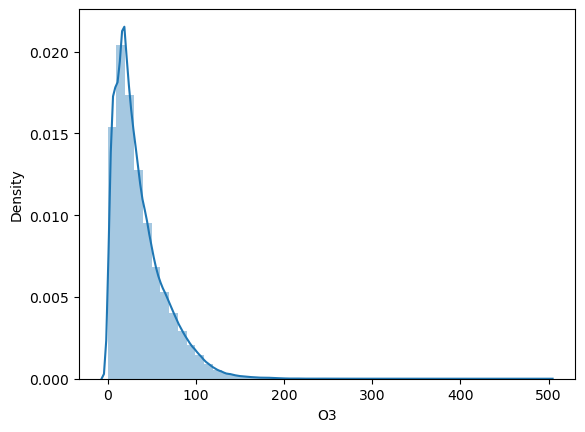

In [9]:
import seaborn as sns
sns.distplot(df['O3'], hist=True, kde=True)
df['O3'].kurt()

In [10]:
df1=pd.read_csv("archive/time_series_dataset.csv",parse_dates=["Date"],index_col=["Date"])
df1

,Temperature
Date,
2023-01-01,23
2023-02-01,25
2023-03-01,27
2023-04-01,22
2023-05-01,24
2023-06-01,25
2023-07-01,23
2023-08-01,27


In [11]:
df1.resample('3M').mean()

,Temperature
Date,
2023-01-31,23.000000
2023-04-30,24.666667
2023-07-31,24.000000
2023-10-31,27.000000


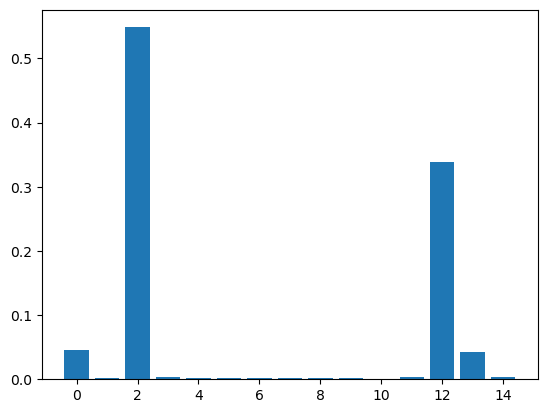

In [12]:
from sklearn.datasets import make_regression
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
X, y = make_regression(n_samples=1000, n_features=15, n_informative=5,
random_state=1)
model = DecisionTreeRegressor()
model.fit(X, y)
importance = model.feature_importances_
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [13]:
pred = model.predict(X)
errors = abs(pred - y)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 0.0 degrees.


In [14]:
mape = 100 * (errors / y)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 100.0 %.
